In [1]:
import os
import sys
import subprocess

import numpy as np
import pandas as pd

from io import StringIO

os.getcwd()

'/home/yotamfr/development/skempi/src'

/home/yotamfr/development/skempi/skempi2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


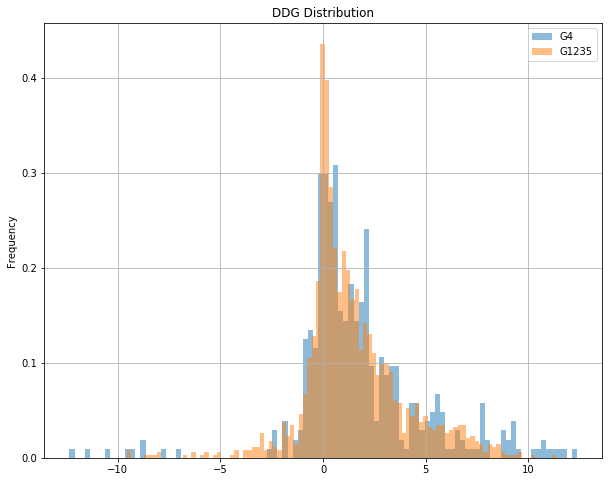

In [2]:
from skempi_consts import *
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload   
%autoreload 2

import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

df = skempi_df
ddg1 = df[df.Protein.isin(G1)].DDG.values
ddg2 = df[df.Protein.isin(G2)].DDG.values
ddg3 = df[df.Protein.isin(G3)].DDG.values
ddg4 = df[df.Protein.isin(G4)].DDG.values
ddg5 = df[df.Protein.isin(G5)].DDG.values

ddg1235 = df[df.Protein.isin(G1 + G2 + G3 + G5)].DDG.values

# plt.hist(ddg1, bins=100, alpha=0.5, label="G1", normed=1, cumulative=False, histtype='bar')
# plt.hist(ddg2, bins=100, alpha=0.5, label="G2", normed=1, cumulative=False, histtype='bar')
# plt.hist(ddg3, bins=100, alpha=0.5, label="G3", normed=1, cumulative=False, histtype='bar')
plt.hist(ddg4, bins=100, alpha=0.5, label="G4", normed=1, cumulative=False, histtype='bar')
# plt.hist(ddg5, bins=100, alpha=0.5, label="G5", normed=1, cumulative=False, histtype='bar')

plt.hist(ddg1235, bins=100, alpha=0.5, label="G1235", normed=1, cumulative=False, histtype='bar')

plt.legend(loc='upper right')
plt.title("DDG Distribution")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [3]:
skempi_df.columns

Index([u'Protein', u'Mutation(s)_PDB', u'Mutation(s)_cleaned', u'Location(s)',
       u'Hold_out_type', u'Hold_out_proteins', u'Affinity_mut (M)',
       u'Affinity_wt (M)', u'DDG', u'Reference', u'Protein 1', u'Protein 2',
       u'Temperature 298.15', u'Temperature Num', u'Temperature',
       u'kon_mut (M^(-1)s^(-1))', u'kon_wt (M^(-1)s^(-1))',
       u'koff_mut (s^(-1))', u'koff_wt (s^(-1))', u'dH_mut (kcal mol^(-1))',
       u'dH_wt (kcal mol^(-1))', u'dS_mut (cal mol^(-1) K^(-1))',
       u'dS_wt (cal mol^(-1) K^(-1))', u'Notes'],
      dtype='object')

In [4]:
skempi_df[skempi_df.Protein=="2VLJ_ABC_DE"]

,Protein,Mutation(s)_PDB,Mutation(s)_cleaned,Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_wt (M),DDG,Reference,...,Temperature,kon_mut (M^(-1)s^(-1)),kon_wt (M^(-1)s^(-1)),koff_mut (s^(-1)),koff_wt (s^(-1)),dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes
2703,2VLJ_ABC_DE,DE32A,DE28A,COR,AB,AB,0.000074,0.000005,1.573201,18275829,...,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2704,2VLJ_ABC_DE,IE53V,IE49V,COR,AB,AB,0.000007,0.000005,0.200969,18275829,...,298,17100.0,31000.0,0.13,0.16,-22.0,-23.0,-50.3,-50.3,NaN
2705,2VLJ_ABC_DE,IE53L,IE49L,COR,AB,AB,0.000057,0.000005,1.418563,18275829,...,298,7000.0,31000.0,0.40,0.16,NaN,NaN,NaN,NaN,NaN
2706,2VLJ_ABC_DE,NE55A,NE51A,RIM,AB,AB,0.000035,0.000005,1.129622,18275829,...,298,18000.0,31000.0,0.63,0.16,-18.0,-23.0,-40.2,-50.3,NaN
2707,2VLJ_ABC_DE,NE55D,NE51D,RIM,AB,AB,0.000012,0.000005,0.495437,18275829,...,298,32300.0,31000.0,0.38,0.16,NaN,NaN,NaN,NaN,NaN
2708,2VLJ_ABC_DE,DE56A,DE52A,COR,AB,AB,0.000006,0.000005,0.132202,18275829,...,298,38000.0,31000.0,0.25,0.16,-24.0,-23.0,-57.0,-50.3,NaN
2709,2VLJ_ABC_DE,QE58A,QE54A,COR,AB,AB,0.000012,0.000005,0.495437,18275829,...,298,28000.0,31000.0,0.34,0.16,-18.0,-23.0,-36.9,-50.3,NaN
2710,2VLJ_ABC_DE,QE58E,QE54E,COR,AB,AB,0.000005,0.000005,0.000000,18275829,...,298,50000.0,31000.0,0.26,0.16,-20.0,-23.0,-43.6,-50.3,NaN
2711,2VLJ_ABC_DE,SE99A,SE95A,SUP,AB,AB,0.000005,0.000005,-0.035206,18275829,...,298,59000.0,31000.0,0.29,0.16,-18.0,-23.0,-33.5,-50.3,NaN
2712,2VLJ_ABC_DE,YE101A,YE97A,COR,AB,AB,0.000008,0.000005,0.232574,18275829,...,298,NaN,NaN,NaN,NaN,-29.0,-23.0,-73.8,-50.3,NaN


In [5]:
from skempi_utils import *
import skempi_consts as consts

In [6]:
record = SkempiStruct("2VLJ", "ABC", "DE")

In [7]:
record['A'].seq

'GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEP'

In [8]:
record.compute_dist_mat()
sphere_ix = record.get_sphere_indices('A', 2, 6)
print(sphere_ix)
shell_ix = record.get_shell_indices('A', 2, 1, 1.5)
print(shell_ix)
print(record.get_profile('A')[(2, 'A')])
print(record)

set([('A', 1), ('A', 27), ('A', 0), ('A', 179), ('A', 100), ('A', 178), ('A', 167), ('A', 102), ('A', 171), ('A', 101), ('A', 106), ('A', 4), ('A', 3), ('A', 2), ('A', 28)])
set([('A', 2)])
0.0017559262511
<SkempiStruct 2VLJ_ABC_DE>


In [9]:
num_mut = 0
pbar = tqdm(range(len(skempi_df)), desc="row processed")
for i, row in skempi_df.iterrows():
    num_mut += len(row["Mutation(s)_cleaned"].split(','))
    pbar.update(1)
pbar.close()
num_mut

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 7287.89it/s]


5177

In [10]:
from scipy.stats import pearsonr

In [11]:
all_features = {}

In [12]:
def get_temperature_array(records, agg=np.min):
    arr = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            res_i, chain_id = mut.i, mut.chain_id
            t = tuple(row.Protein.split('_'))
            skempi_record = records[t]
            res = skempi_record[chain_id][res_i]
            temps = [a.temp for a in res.atoms]
            arr_obs_mut.append(np.mean(temps))
        arr.append(agg(arr_obs_mut))
        pbar.update(1)
    pbar.close()
    return arr

skempi_records = load_skempi_structs(pdb_path="../data/pdbs_n", compute_dist_mat=False)
all_features["B-factor"] = temp_arr = get_temperature_array(skempi_records, agg=np.min)
pearsonr(temp_arr, skempi_df.DDG)

row processed: 100%|██████████| 3047/3047 [00:01<00:00, 2196.76it/s]


(-0.26127841191178325, 9.7224897486097619e-49)

In [13]:
from aaindex import *
B = BLOSUM62
C = SKOJ970101

In [14]:
skempi_records = load_skempi_structs(pdb_path="../data/pdbs")

skempi structures processed: 100%|██████████| 158/158 [00:57<00:00,  2.74it/s]


In [15]:
def comp_ei(mut, skempi_record, B, radius):
    P = skempi_record.get_profile(mut.chain_id)
    return EI(mut.m, mut.w, P, mut.i, B)


def comp_cp(mut, skempi_record, C, radius):
    return CP(mut, skempi_record, C, radius)


def get_ddg_ei_cp_arrays(M, func, radius=None):
    arr_ddg = []
    arr_obs = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        ddg = row.DDG
        arr_ddg.append(ddg)
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            obs = func(mut, skempi_record, M, radius)
            arr_obs_mut.append(obs)
        arr_obs.append(np.sum(arr_obs_mut))
        pbar.update(1)
    pbar.close()
    return arr_ddg, arr_obs

In [16]:
from itertools import product

def grid_search_cp(matrices=[SKOJ970101, BASU010101], radiuses=[4, 5, 6, 7, 8, 9, 10]):
    res_dict = {}
    for C, angs in product(matrices, radiuses):
        key = (str(C), angs)
        arr_ddg, arr_cp = get_ddg_ei_cp_arrays(C, comp_cp, angs)
        res_dict[key] = (arr_ddg, arr_cp)
        cor_cp = pearsonr(arr_ddg, arr_cp)
        print("%s: CP: %s" % (key, cor_cp,))
    return res_dict

def grid_search_ei(matrices=[BLOSUM62, SKOJ970101, BASU010101]):
    res_dict = {}
    for B in matrices:
        key = str(B)
        arr_ddg, arr_ei = get_ddg_ei_cp_arrays(B, comp_ei)
        res_dict[key] = (arr_ddg, arr_ei)
        cor_ei = pearsonr(arr_ddg, arr_ei)
        print("%s: EI: %s" % (key, cor_ei,))
    return res_dict

In [17]:
# cps = grid_search_cp()

In [18]:
def comp_cp_a_b(mut, skempi_record, C, radius):
    return CP_A_B(mut, skempi_record, C, radius)


def get_ddg_cp_a_b_arrays(M, func, radius=None):
    arr_ddg = []
    arr_obs_a = []
    arr_obs_b = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        ddg = row.DDG
        arr_ddg.append(ddg)
        arr_obs_mut_a = []
        arr_obs_mut_b = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            obs_a, obs_b = func(mut, skempi_record, M, radius)
            arr_obs_mut_a.append(obs_a)
            arr_obs_mut_b.append(obs_b)
        arr_obs_a.append(np.sum(arr_obs_mut_a))
        arr_obs_b.append(np.sum(arr_obs_mut_b))
        pbar.update(1)
    pbar.close()
    return arr_ddg, arr_obs_a, arr_obs_b


def grid_search_cp_a_b(matrices=[SKOJ970101, BASU010101], radiuses=[4, 5, 6, 7, 8, 9, 10]):
    res_dict = {}
    for C, angs in product(matrices, radiuses):
        key = (str(C), angs)
        arr_ddg, arr_cp_a, arr_cp_b  = get_ddg_cp_a_b_arrays(C, comp_cp_a_b, angs)
        arr_cp = np.asarray(arr_cp_a) + np.asarray(arr_cp_b)
        res_dict[key] = (arr_ddg, arr_cp_a, arr_cp_b)
        cor_cp_a = pearsonr(arr_ddg, arr_cp_a)
        cor_cp_b = pearsonr(arr_ddg, arr_cp_b)
        cor_cp = pearsonr(arr_ddg, arr_cp)
        print("%s: CP_A: %s, CP_B: %s, CP %s" % (key, cor_cp_a, cor_cp_b, cor_cp))
    return res_dict

In [19]:
def CP_A_B(mut, skempi, C, radius=6):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    def helper(P, j):
        return sum([P[(j, a)] * (C[(a, m)] - C[(a, w)]) for a in amino_acids])
    
    retA, retB = 0, 0
    for chain_b, j in skempi.get_sphere_indices(chain_a, i,radius):

        a = skempi[chain_b][j].name
        if j == i and chain_b == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_b) 

        if chain_b == chain_a:  
            retA += helper(P, j)
        
        else:
            retB += helper(P, j)
    
    return retA, retB

In [20]:
# cp_a_b_s_orig = grid_search_cp_a_b(matrices=[SKOJ970101, BASU010101], radiuses=[4, 5, 6, 7, 8, 9, 10])

In [21]:
def CP_A_B(mut, skempi, C, radius=6):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    def helper(a, j):
        return C[(a, m)] - C[(a, w)]
    
    retA, retB = 0, 0
    for chain_b, j in skempi.get_sphere_indices(chain_a, i, radius):

        a = skempi[chain_b][j].name
        if j == i and chain_b == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_b) 

        if chain_b == chain_a:  
            retA += helper(a, j)
        
        else:
            retB += helper(a, j)
    
    return retA, retB

In [22]:
# cp_a_b_s_no_profile = grid_search_cp_a_b(matrices=[BASU010101], radiuses=[2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0])

In [23]:
def CP_A_B(mut, skempi, C, radius=6):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    def helper(P, j):
        return sum([0.05 * (C[(a, m)] - C[(a, w)]) for a in amino_acids])
    
    retA, retB = 0, 0
    for chain_b, j in skempi.get_sphere_indices(chain_a, i,radius):

        a = skempi[chain_b][j].name
        if j == i and chain_b == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_b) 

        if chain_b == chain_a:  
            retA += helper(P, j)
        
        else:
            retB += helper(P, j)
    
    return retA, retB

In [24]:
# cp_a_b_s_uniform = grid_search_cp_a_b(matrices=[SKOJ970101, BASU010101], radiuses=[6, 7])

In [25]:
eis = grid_search_ei(matrices=[BLOSUM62])

row processed: 100%|██████████| 3047/3047 [00:01<00:00, 2859.49it/s]

BLOSUM62: EI: (-0.27028535068257847, 3.6876795510218673e-52)


In [26]:
def register_cp_a_b(cp_a_b, prefix):
    for key, val in cp_a_b.iteritems():
        _, cp_a, cp_b = val
        mat, rad = key
        all_features[(prefix, "CP_A", mat, rad)] = cp_a
        all_features[(prefix, "CP_B", mat, rad)] = cp_b
        
def register_cp_a_b_shells(cp_a_b, prefix):
    for key, val in cp_a_b.iteritems():
        _, cp_a, cp_b = val
        mat, inner, outer = key
        all_features[(prefix, "CP_A", mat, inner, outer)] = cp_a
        all_features[(prefix, "CP_B", mat, inner, outer)] = cp_b
        all_features[(prefix, "CP", mat, inner, outer)] = np.sum([cp_a, cp_b], axis=0)
        
def register_eis(eis):
    for key, val in eis.iteritems():
        _, ei = val
        all_features[("EI", key)] = ei

In [27]:
def CP_A_B(mut, skempi, C, inner, outer):
    
    i, chain_a = mut.i, mut.chain_id
    m, w = mut.m, mut.w
    
    retA, retB = 0, 0
    for chain_id, j in skempi.get_shell_indices(chain_a, i, inner, outer):

        a = skempi[chain_id][j].name
        if j == i and chain_id == chain_a:
            assert a == w
            continue
                
        P = skempi.get_profile(chain_id) 

        if chain_id == chain_a:  
            retA += C[(a, m)] - C[(a, w)]
        else:
            retB += C[(a, m)] - C[(a, w)]
    
    return retA, retB

In [28]:
def get_cp_a_b_array(M, inner, outer):
    arr_obs_a = []
    arr_obs_b = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut_a = []
        arr_obs_mut_b = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            obs_a, obs_b = CP_A_B(mut, skempi_record, M, inner, outer)
            arr_obs_mut_a.append(obs_a)
            arr_obs_mut_b.append(obs_b)
        arr_obs_a.append(np.sum(arr_obs_mut_a))
        arr_obs_b.append(np.sum(arr_obs_mut_b))
        pbar.update(1)
    pbar.close()
    return arr_obs_a, arr_obs_b


In [29]:
matrices = [BASU010101]
shells = [(0.0, 2.0), (2.0, 4.0), (4.0, 6.0), (6.0, 8.0)]

def grid_search_cp(matrices=matrices, shells=shells):
    res_dict = {}
    grid = [(mat, shell) for mat in matrices for shell in shells]
    for mat, (inner, outer) in grid:
        arr_cp_a, arr_cp_b  = get_cp_a_b_array(mat, inner, outer)
        arr_cp = np.asarray(arr_cp_a) + np.asarray(arr_cp_b)
        arr_ddg = skempi_df.DDG
        cor_cp_a = pearsonr(arr_ddg, arr_cp_a)
        cor_cp_b = pearsonr(arr_ddg, arr_cp_b)
        cor_cp = pearsonr(arr_ddg, arr_cp)
        key = (str(mat), inner, outer)
        res_dict[key] = (arr_ddg, arr_cp_a, arr_cp_b)
        print("%s: CP_A: %s, CP_B: %s, CP %s" % (key, cor_cp_a, cor_cp_b, cor_cp))
    return res_dict

cp_a_b_s_shells = grid_search_cp(matrices, shells)

row processed: 100%|██████████| 3047/3047 [00:01<00:00, 1997.60it/s]
/home/yotamfr/development/skempi/skempi2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
row processed:   6%|▋         | 197/3047 [00:00<00:01, 1968.52it/s]

('BASU010101', 0.0, 2.0): CP_A: (nan, 1.0), CP_B: (nan, 1.0), CP (nan, 1.0)


row processed:   5%|▌         | 165/3047 [00:00<00:01, 1648.32it/s]

('BASU010101', 2.0, 4.0): CP_A: (0.10747008966835973, 2.7292374112956823e-09), CP_B: (0.21584991101788475, 1.8863222839984622e-33), CP (0.1881605058816436, 1.1155323351514019e-25)


row processed:   3%|▎         | 105/3047 [00:00<00:02, 1049.33it/s]

('BASU010101', 4.0, 6.0): CP_A: (0.13469794905420057, 8.2496700290367863e-14), CP_B: (0.32195124705919709, 1.9785883499632363e-74), CP (0.24393763258146428, 1.6049648848021822e-42)


row processed: 100%|██████████| 3047/3047 [00:02<00:00, 1281.59it/s]

('BASU010101', 6.0, 8.0): CP_A: (0.13144064017289286, 3.23774711194613e-13), CP_B: (0.34863398298609077, 8.4955683746223299e-88), CP (0.26259906362518293, 3.1220607382065014e-49)


In [30]:
# register_cp_a_b(cp_a_b_s_uniform, "uniform")
# register_cp_a_b(cp_a_b_s_orig, "original")
# register_cp_a_b(cp_a_b_s_no_profile, "no_profile")
register_cp_a_b_shells(cp_a_b_s_shells, "shells")
register_eis(eis)

In [31]:
num_muts = np.asarray([len(mut.split(",")) for mut in skempi_df["Mutation(s)_cleaned"]])
pearsonr(skempi_df.DDG, np.log(num_muts)), pearsonr(skempi_df.DDG, num_muts)

((0.21924597848778335, 1.7513323606150017e-34),
 (0.13427861416945261, 9.8559457179327132e-14))

In [32]:
all_features["#mutations"] = np.log(num_muts)

In [33]:
def get_stride_array(func, agg=np.sum):
    arr_stride = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            res_i, chain_id = mut.i, mut.chain_id
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            d_asa = skempi_record.stride[(chain_id, res_i)]
            obs = func(d_asa)
            arr_obs_mut.append(obs)
        total = skempi_record.stride._total
        arr_stride.append((agg(arr_obs_mut), total))
        pbar.update(1)
    pbar.close()
    return arr_stride

In [34]:
asa_arr_mutated, asa_arr_total = zip(*get_stride_array(lambda stride: stride["ASA_Chain"]-stride["ASA"]))

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 3741.28it/s]


In [35]:
all_features["sum(ASA_Chain-ASA):mutated"] = asa_arr_mutated
pearsonr(skempi_df.DDG, asa_arr_mutated)

(0.44807091830983697, 2.1281783251917486e-150)

In [36]:
all_features["sum(ASA_Chain-ASA):total"] = asa_arr_total
pearsonr(skempi_df.DDG, asa_arr_total)

(-0.10497237282886315, 6.3181344671734397e-09)

In [37]:
def get_desc_array(mat, agg=np.mean):
    arr = []
    pbar = tqdm(range(len(skempi_df)), desc="row processed")
    for i, row in skempi_df.iterrows():
        arr_obs_mut = []
        for mutation in row["Mutation(s)_cleaned"].split(','):
            mut = Mutation(mutation)
            res_i, chain_id = mut.i, mut.chain_id
            t = tuple(row.Protein.split('_'))
            skempi_record = skempi_records[t]
            res = skempi_record[chain_id][res_i]
            desc = mat[mut.m] - mat[mut.w]
            arr_obs_mut.append(desc)
        arr.append(agg(arr_obs_mut))
        pbar.update(1)
    pbar.close()
    return arr

In [38]:
M = FASG760101
mol_arr = get_desc_array(M, np.mean)
all_features["MolWeight"] = mol_arr
pearsonr(mol_arr, skempi_df.DDG)

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 3791.70it/s]


(-0.091488260683632652, 4.2221663948409655e-07)

In [39]:
H = ARGP820101
hyd_arr = get_desc_array(H, np.mean)
all_features["Hydrophobic"] = hyd_arr
pearsonr(hyd_arr, skempi_df.DDG)

row processed: 100%|██████████| 3047/3047 [00:00<00:00, 3320.21it/s]


(-0.11744770075985848, 7.8771918513956187e-11)

In [40]:
DSSP = ["G", "H", "I", "T", "E", "B", "S", "C"]

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

lb.fit(DSSP) 

def get_bin_ss(stride):
    return lb.transform([stride["SS"]])[0]

In [41]:
from sklearn.decomposition import PCA
ss_arr, _ = zip(*get_stride_array(get_bin_ss, agg=lambda a: np.sum(a, axis=0)))
n_components = 3
ss_arr = PCA(n_components=n_components).fit_transform(ss_arr)
[pearsonr(skempi_df.DDG, np.asarray(ss_arr)[:, j]) for j in range(n_components)]

row processed: 100%|██████████| 3047/3047 [00:03<00:00, 999.36it/s] 


[(0.089741283447261219, 6.9890640112449523e-07),
 (-0.20117361710368117, 3.4419911412303145e-29),
 (0.070195836339034604, 0.00010532780685949925)]

In [42]:
class XCor(object):
    
    def __init__(self, all_features):
        self.feat_name_to_indx = {key:i for i, key in enumerate(all_features.keys())}
        self.xcor_mat = np.corrcoef(np.asarray(all_features.values()))
        
    def __getitem__(self, t):
        feat1, feat2 = t
        i = self.feat_name_to_indx[feat1]
        j = self.feat_name_to_indx[feat2]
        return self.xcor_mat[(i, j)]

In [43]:
xcor = XCor(all_features)

/home/yotamfr/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/yotamfr/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [44]:
import itertools
def search_min_xcor(all_features, th=0.05):
    acc = set()
    for comb in itertools.combinations(all_features.keys(), 2):
        feat1, feat2 = comb
        rho = xcor[(feat1, feat2)]
        if abs(rho) < th:
            acc.add(feat1)
            acc.add(feat2)
    return acc

In [45]:
acc_feats = search_min_xcor(all_features)
len(acc_feats), acc_feats
acc_feats = {
  '#mutations',
#   'B-factor',
  'Hydrophobic',
  'MolWeight',
  'sum(ASA_Chain-ASA):mutated',
  ('EI', 'BLOSUM62'),
#   ('shells', 'CP_A', 'BASU010101', 0.0, 2.0),
  ('shells', 'CP_A', 'BASU010101', 2.0, 4.0),
  ('shells', 'CP_A', 'BASU010101', 4.0, 6.0),
#   ('shells', 'CP_B', 'BASU010101', 6.0, 8.0),
#   ('shells', 'CP_B', 'BASU010101', 0.0, 2.0),
  ('shells', 'CP_B', 'BASU010101', 2.0, 4.0),
  ('shells', 'CP_B', 'BASU010101', 4.0, 6.0),
#   ('shells', 'CP_B', 'BASU010101', 6.0, 8.0),
}

In [46]:
X = np.transpose([all_features[feat] for feat in acc_feats])
# X = np.concatenate([X, np.asarray(ss_arr)], axis=1)
X.shape

(3047, 9)

In [47]:
df = skempi_df
from sklearn.preprocessing import StandardScaler

def run_cv_test(X, get_regressor, normalize=0):
    gt, preds = [], []
    for group in [G1, G2, G3, G4, G5]:
        indx_tst = df.Protein.isin(group)
        indx_trn = np.logical_not(indx_tst)
        y_trn = df.DDG[indx_trn]
        y_true = df.DDG[indx_tst]
        X_trn = X[indx_trn]
        X_tst = X[indx_tst]
        regressor = get_regressor()
        if normalize == 1:
            scaler = StandardScaler()
            scaler.fit(X_trn)
            X_trn, X_tst = scaler.transform(X_trn), scaler.transform(X_tst)
        regressor.fit(X_trn, y_trn)
        y_pred = regressor.predict(X_tst)
        print(pearsonr(y_true, y_pred))
        preds.extend(y_pred)
        gt.extend(y_true)
    return gt, preds

In [48]:
from sklearn.ensemble import RandomForestRegressor
def get_regressor(): return RandomForestRegressor(n_estimators=50, random_state=0)
gt, preds = run_cv_test(X, get_regressor, normalize=1)
print(pearsonr(gt, preds))
len(gt)

(0.69279600203100511, 9.1804989157982598e-58)
(0.49015346256535852, 6.8625208219965142e-22)
(0.5701000485124651, 2.0075909963622205e-35)
(0.42007597521319229, 2.1915203512820726e-19)
(0.67036721894308893, 1.7595163499514873e-68)
(0.54720496905900795, 1.4606308335611058e-161)


2064

In [49]:
from sklearn.svm import SVR
def get_regressor(): return SVR(kernel='rbf')
gt, preds = run_cv_test(X, get_regressor, normalize=1)
print(pearsonr(gt, preds))
len(gt)

(0.6418389566461038, 3.0502485685657789e-47)
(0.49707942012655615, 1.4755799107698571e-22)
(0.49349512170334436, 1.2290398234944799e-25)
(0.42080214824790396, 1.8736509275682552e-19)
(0.52960988675265142, 1.4159437847759403e-38)
(0.49758261395256498, 1.4887057902296886e-129)


2064

In [50]:
def run_cv_test(X, alpha=0.5, normalize=1):
    gt, preds = [], []
    for group in [G1, G2, G3, G4, G5]:
        indx_tst = df.Protein.isin(group)
        indx_trn = np.logical_not(indx_tst)
        y_trn = df.DDG[indx_trn]
        y_true = df.DDG[indx_tst]
        X_trn = X[indx_trn]
        X_tst = X[indx_tst]
        rf = RandomForestRegressor(n_estimators=50, random_state=0)
        svr = SVR(kernel='rbf')
        if normalize == 1:
            scaler = StandardScaler()
            scaler.fit(X_trn)
            X_trn, X_tst = scaler.transform(X_trn), scaler.transform(X_tst)
        svr.fit(X_trn, y_trn)
        rf.fit(X_trn, y_trn)
        y_pred_svr = svr.predict(X_tst)
        y_pred_rf = rf.predict(X_tst)
        y_pred = alpha * y_pred_svr + (1-alpha) * y_pred_rf
        print(pearsonr(y_true, y_pred))
        preds.extend(y_pred)
        gt.extend(y_true)
    return gt, preds

In [51]:
gt, preds = run_cv_test(X, normalize=1)
print(pearsonr(gt, preds))
len(gt)

(0.68995764394166315, 4.0390005032370189e-57)
(0.51045469745328897, 6.8553957198700105e-24)
(0.57017759217105091, 1.9563077691539126e-35)
(0.4339725258259271, 1.0217752671876987e-20)
(0.64361363039461883, 1.4363171559578696e-61)
(0.54607496242340392, 9.0019705805224639e-161)


2064

In [52]:
cp_b = np.asarray(all_features[('shells', 'CP_B', 'BASU010101', 4.0, 6.0)])
cp_a = np.asarray(all_features[('shells', 'CP_A', 'BASU010101', 4.0, 6.0)])
ei = np.asarray(all_features[('EI', 'BLOSUM62')])
ddg = skempi_df.DDG

In [53]:
c1 = pearsonr(ei, ddg)[0]
c2 = pearsonr(cp_a, ddg)[0]
c3 = pearsonr(cp_b, ddg)[0]
s = c1 + c2 + c3
a1 = c1/s
a2 = c2/s
a3 = c3/s
c1, c2, c3

(-0.27028535068257847, 0.13469794905420057, 0.32195124705919709)

In [54]:
ddg_hat =  np.multiply(a1, ei) + np.multiply(a2, cp_a) + np.multiply(a3, cp_b)
pearsonr(ddg_hat, ddg)

(0.35216325342895516, 1.1496304244762025e-89)